In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [84]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', header=None)

In [85]:
df.columns = ['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_And_GLobulin_Ratio','Dataset']
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_And_GLobulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [86]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Age
False    583
Name: Age, dtype: int64

Gender
False    583
Name: Gender, dtype: int64

Total_Bilirubin
False    583
Name: Total_Bilirubin, dtype: int64

Direct_Bilirubin
False    583
Name: Direct_Bilirubin, dtype: int64

Alkaline_Phosphotase
False    583
Name: Alkaline_Phosphotase, dtype: int64

Alamine_Aminotransferase
False    583
Name: Alamine_Aminotransferase, dtype: int64

Aspartate_Aminotransferase
False    583
Name: Aspartate_Aminotransferase, dtype: int64

Total_Protiens
False    583
Name: Total_Protiens, dtype: int64

Albumin
False    583
Name: Albumin, dtype: int64

Albumin_And_GLobulin_Ratio
False    579
True       4
Name: Albumin_And_GLobulin_Ratio, dtype: int64

Dataset
False    583
Name: Dataset, dtype: int64



In [87]:
avg_AGR = df['Albumin_And_GLobulin_Ratio'].astype(float).mean(axis=0)
print("Mean of Albumin_And_GLobulin_Ratio :", avg_AGR)

Mean of Albumin_And_GLobulin_Ratio : 0.9470639032815201


In [88]:
df['Albumin_And_GLobulin_Ratio'].replace(np.nan, avg_AGR, inplace = True)

In [89]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Age
False    583
Name: Age, dtype: int64

Gender
False    583
Name: Gender, dtype: int64

Total_Bilirubin
False    583
Name: Total_Bilirubin, dtype: int64

Direct_Bilirubin
False    583
Name: Direct_Bilirubin, dtype: int64

Alkaline_Phosphotase
False    583
Name: Alkaline_Phosphotase, dtype: int64

Alamine_Aminotransferase
False    583
Name: Alamine_Aminotransferase, dtype: int64

Aspartate_Aminotransferase
False    583
Name: Aspartate_Aminotransferase, dtype: int64

Total_Protiens
False    583
Name: Total_Protiens, dtype: int64

Albumin
False    583
Name: Albumin, dtype: int64

Albumin_And_GLobulin_Ratio
False    583
Name: Albumin_And_GLobulin_Ratio, dtype: int64

Dataset
False    583
Name: Dataset, dtype: int64



In [90]:
X=df.drop('Dataset', axis=1).copy()
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_And_GLobulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [91]:
y=df['Dataset'].copy()
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    2
9    1
Name: Dataset, dtype: int64

In [92]:
pd.get_dummies(X, columns=['Gender']).head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_And_GLobulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [93]:
X=pd.get_dummies(X, columns=['Gender'])

In [94]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_And_GLobulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=True)


In [96]:
y_train.shape

(437,)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
classifier= LogisticRegression(random_state=0, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
pred=classifier.predict(X_test)
accuracy_score(y_test, pred)

0.7328767123287672

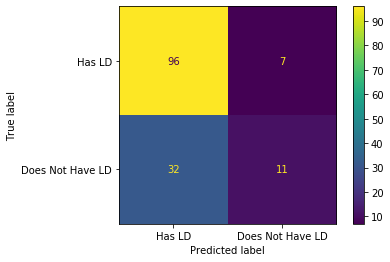

In [100]:
plot_confusion_matrix(classifier,
                       X_test,
                       y_test,
                       display_labels=['Has LD','Does Not Have LD'])

In [101]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.75      0.93      0.83       103
           2       0.61      0.26      0.36        43

    accuracy                           0.73       146
   macro avg       0.68      0.59      0.60       146
weighted avg       0.71      0.73      0.69       146



<h2>With Scaling</h2>

In [114]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [115]:
classifier= LogisticRegression(random_state=0, max_iter=10000)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
pred=classifier.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.7328767123287672

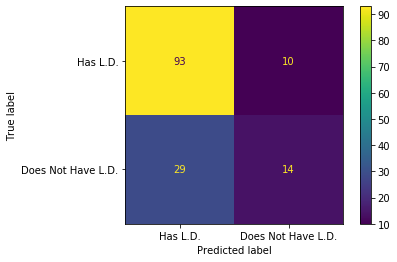

In [117]:
plot_confusion_matrix(classifier,
                       X_test_scaled,
                       y_test,
                       display_labels=['Has L.D.','Does Not Have L.D.'])

In [118]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.76      0.90      0.83       103
           2       0.58      0.33      0.42        43

    accuracy                           0.73       146
   macro avg       0.67      0.61      0.62       146
weighted avg       0.71      0.73      0.71       146



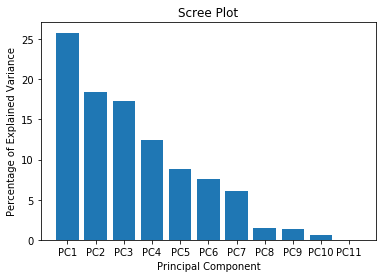

In [105]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

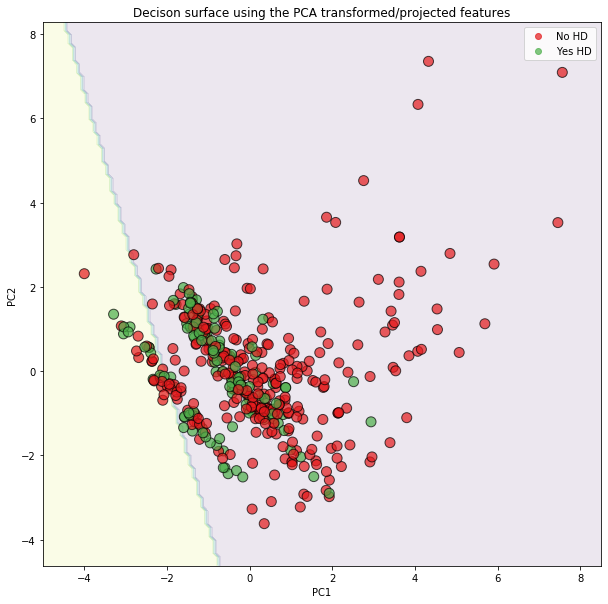

In [106]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]


classifier.fit(np.column_stack((pc1, pc2)), y_train)


x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))


Z = classifier.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)


cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')

plt.show()

<h2>Support Vector Machines</h2>

In [119]:
clf_svm = SVC(kernel ='linear', random_state=0)
clf_svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [120]:
pred=classifier.predict(X_test)
accuracy_score(y_test, pred)

0.7054794520547946

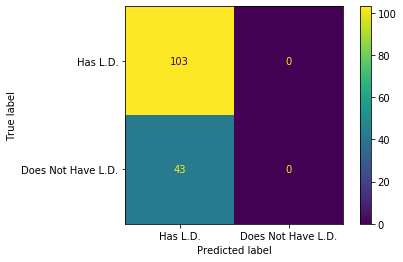

In [108]:
plot_confusion_matrix(clf_svm ,
                       X_test,
                       y_test,
                      values_format='',
                       display_labels=['Has L.D.','Does Not Have L.D.'])

<h2>With Scaling</h2>

In [109]:
clf_svm = SVC(kernel ='linear', random_state=0)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

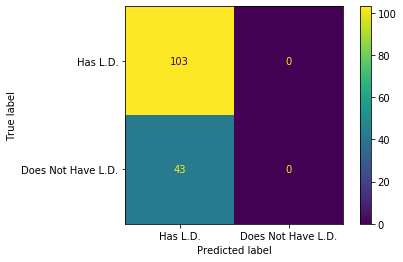

In [110]:
plot_confusion_matrix(clf_svm ,
                       X_test_scaled,
                       y_test,
                      values_format='',
                       display_labels=['Has L.D.','Does Not Have L.D.'])

In [121]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       103
           2       0.00      0.00      0.00        43

    accuracy                           0.71       146
   macro avg       0.35      0.50      0.41       146
weighted avg       0.50      0.71      0.58       146



C:\Users\RANGSUO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>Naive_bayes</h2>

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
clf_NB= GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [126]:
pred=clf_NB.predict(X_test)
accuracy_score(y_test, pred)

0.6164383561643836

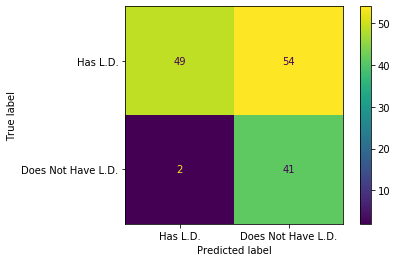

In [113]:
plot_confusion_matrix(clf_NB,
                       X_test,
                       y_test,
                      values_format='',
                       display_labels=['Has L.D.','Does Not Have L.D.'])

In [127]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.48      0.64       103
           2       0.43      0.95      0.59        43

    accuracy                           0.62       146
   macro avg       0.70      0.71      0.62       146
weighted avg       0.80      0.62      0.62       146



<h2>With Scaling</h2>

In [130]:
clf_NB= GaussianNB()
clf_NB.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [132]:
pred=clf_NB.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.5616438356164384

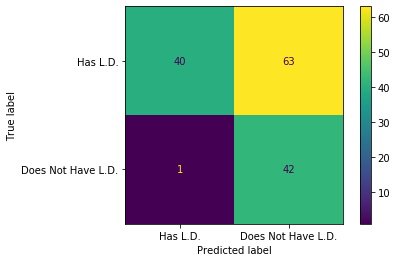

In [133]:
plot_confusion_matrix(clf_NB,
                       X_test_scaled,
                       y_test,
                      values_format='',
                       display_labels=['Has L.D.','Does Not Have L.D.'])

In [134]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      0.39      0.56       103
           2       0.40      0.98      0.57        43

    accuracy                           0.56       146
   macro avg       0.69      0.68      0.56       146
weighted avg       0.81      0.56      0.56       146



<h2>Decision Tree</h2>

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
clf_DTC=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf_DTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [144]:
pred=clf_DTC.predict(X_test)
accuracy_score(y_test, pred)

0.6917808219178082

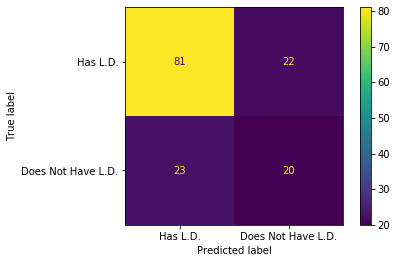

In [145]:
plot_confusion_matrix(clf_DTC,
                       X_test,
                       y_test,
                      values_format='',
                       display_labels=['Has L.D.','Does Not Have L.D.'])

In [146]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.78      0.79      0.78       103
           2       0.48      0.47      0.47        43

    accuracy                           0.69       146
   macro avg       0.63      0.63      0.63       146
weighted avg       0.69      0.69      0.69       146



<h2>With Scaling</h2>

In [147]:
clf_DTC=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf_DTC.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [148]:
pred=clf_DTC.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.6575342465753424

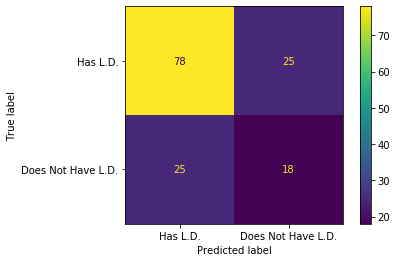

In [149]:
plot_confusion_matrix(clf_DTC,
                       X_test_scaled,
                       y_test,
                      values_format='',
                       display_labels=['Has L.D.','Does Not Have L.D.'])

In [150]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76       103
           2       0.42      0.42      0.42        43

    accuracy                           0.66       146
   macro avg       0.59      0.59      0.59       146
weighted avg       0.66      0.66      0.66       146

